# Advent of code

### Problem 1 (Circular Dial Password )

You are given a circular dial numbered 0-99 and a sequence of rotation instructions.

**Dial Properties:**
- The dial starts at position 50
- Rotating left (L) decreases the number; rotating right (R) increases it
- The dial wraps around: left from 0 goes to 99, right from 99 goes to 0

**Input:**
- A list of tuples `[(direction, distance), ...]` where:
  - `direction` is either `'L'` (left) or `'R'` (right)
  - `distance` is a positive integer

**Task:**
Count how many times the dial points at 0 **after completing** each rotation.

#### Part 1

In [8]:
with open('input_day1.txt', 'r') as file:
    instructions = []
 
    for line in file:
        direction = line[0]
        value = int(line[1:].strip())
        instructions.append((direction, value))
print(instructions[:5])
start = 50
counter = 0
for direction, value in instructions:
    if direction == 'L':
        start = (start-value) % 100
    elif direction == 'R':
        start = (start+value) % 100
    if start == 0:
        counter += 1
counter

[('R', 10), ('L', 39), ('L', 30), ('L', 9), ('R', 28)]


995

#### Part 2 ( Counting Zero Points)

Same setup as Part 1, but now count **every time** the dial points at 0, including:
- When a rotation **ends** at 0
- When the dial **passes through** 0 during a rotation


In [4]:
# test example:
 
instructions_test = [('L', 68), ('L', 30), ('R', 48), ('L', 5), ('R', 60), ('L', 55), ('L', 1), ('L', 99), ('R', 14), ('L', 82)]

In [14]:
#instructions
# answer is too high
start = 50
counter = 0
for direction, value in instructions:
    # print("current", counter, direction, value,start)
    if direction == 'L':
        start1 = start
        raw = (start-value) 
        hops = abs(raw // 100)
        if start1 % 100 == 0 and hops > 0:
            hops -= 1
        counter += hops

    elif direction == 'R':
        start1 = start
        raw = (start+value) 
        hops = abs(raw // 100)
        if start1 % 100 == 0 and hops > 0:
            hops -= 1
        counter += hops
        # print("after R"+str(value), counter, start)
    if raw % 100 == 0 and hops == 0:
        counter += 1
        
    start = raw % 100    

counter

5652

In [15]:
start = 50
counter = 0
for direction, value in instructions:
    old_start = start
    
    if direction == 'L':
        raw = start - value
    elif direction == 'R':
        raw = start + value
    ended_at_zero = (raw % 100 == 0)
    hops = abs((raw // 100) - (old_start // 100))

    if direction == 'L':
        if raw < start:
            if ended_at_zero:
 
                wraps = ((start - 1) // 100) - ((raw + 100 - 1) // 100)
            else:
                wraps = ((start - 1) // 100) - (raw // 100)
        else:
            wraps = 0
    else:   
        if raw > start:
            if ended_at_zero:
                # dont count the ending  
                wraps = ((raw - 100) // 100) - (start // 100)
            else:
                wraps = (raw // 100) - (start // 100)
        else:
            wraps = 0
    
    counter += wraps
    start = raw % 100
    
    #  if we ended at 0
    if ended_at_zero:
        counter += 1

In [16]:
counter

5847

### Problem: Invalid Product IDs

You are given a list of product ID ranges. Each range is defined by a start ID and end ID (inclusive). Your task is to find all "invalid" IDs within these ranges and return their sum.

**Invalid ID Definition:**
An ID is invalid if it consists of a sequence of digits repeated  twice.

**Examples of Invalid IDs:**
- `11` (digit "1" repeated twice)
- `6464` (sequence "64" repeated twice)
- `123123` (sequence "123" repeated twice)
- `99` (digit "9" repeated twice)

**Important:** Numbers never have leading zeros. For example, `0101` is not considered an ID.


In [19]:
with open('input_day2.txt', 'r') as file:
    ranges = file.readlines()[0].split(",")
ranges = [r.strip().split("-") for r in ranges]
ranges

[['82853534', '82916516'],
 ['2551046', '2603239'],
 ['805115', '902166'],
 ['3643', '7668'],
 ['4444323719', '4444553231'],
 ['704059', '804093'],
 ['32055', '104187'],
 ['7767164', '7799624'],
 ['25', '61'],
 ['636', '1297'],
 ['419403897', '419438690'],
 ['66', '143'],
 ['152', '241'],
 ['965984', '1044801'],
 ['1', '19'],
 ['376884', '573880'],
 ['9440956', '9477161'],
 ['607805', '671086'],
 ['255', '572'],
 ['3526071225', '3526194326'],
 ['39361322', '39455443'],
 ['63281363', '63350881'],
 ['187662', '239652'],
 ['240754', '342269'],
 ['9371', '26138'],
 ['1720', '2729'],
 ['922545', '957329'],
 ['3477773', '3688087'],
 ['104549', '119841']]

In [21]:
def repeats(string):
 
    if len(string) % 2 != 0:
        return False
    
    mid = len(string) // 2
    return string[:mid] == string[mid:]

# Test
repeats("labubulabu") 
repeats("labubulabubu")  


True

In [22]:
total = 0
for r in ranges:
    a, b = int(r[0]), int(r[1])
    for num in range(a, b+1):
        if repeats(str(num)):
            total += num
print(total)

18595663903


### Part 2 Invalid Product IDs (Part 2)

Same as Part 1, but now an ID is invalid if it consists of a sequence of digits repeated **at least twice** (not just exactly twice).

**Examples of Invalid IDs:**
- `11` (1 repeated 2 times)
- `111` (1 repeated 3 times)
- `123123` (123 repeated 2 times)
- `12341234` (1234 repeated 2 times)
- `1212121212` (12 repeated 5 times)

In [23]:
def repeats(string):
    for size in range(1, len(string)//2 + 1):
        if len(string) % size == 0:
            times = len(string) // size
            if string[:size] * times == string:
                return True
    return False
total = 0
for r in ranges:
    a, b = int(r[0]), int(r[1])
    for num in range(a, b+1):
        if repeats(str(num)):
            total += num
print(total)

19058204438


### Problem: Maximum Two-Digit Number from String

You are given a list of strings containing digits. For each string, select exactly two digits (maintaining their original order) to form the largest possible two-digit number.

**Rules:**
- Select exactly 2 digits from each string
- The two digits must maintain their original relative order (i < j)
- Find the maximum two-digit number possible
- Sum the maximum values from all strings
 

In [7]:
with open('input_day3.txt', 'r') as file:
    banks = file.readlines()

banks = [r.strip() for r in banks]
banks[:5]


['3443334373333545324339252335233845533545245422755419334136447332543353734352333342352363164324383844',
 '3433434334423225944433232334354334442333333924335333942343333233383543372333445344524534333323244433',
 '6445452443354336524556464436667635356536446542335532632338343422556865453434662554935342463434223136',
 '2522122122222222213514222332223223222122232532121112132223123212333143222121122332225253222212321211',
 '1222223242242124231221324122442244142124714212424435424317222323122242413232232443422232242244223233']

In [ ]:
total = 0
for bank in banks:
    current_max = 0
    for i in range(len(bank)-1):
        for j in range(i+1, len(bank)):
            current_max = max(current_max, int(bank[i]+bank[j]))
    total += current_max
total
# O(n^2)

17452

In [11]:
total = 0
for bank in banks:
    s = max(bank)
    s_idx = bank.index(s)

    if s_idx < len(bank) - 1:
        second = max(bank[s_idx + 1:])
        total += int(s + second)
    else:
        remaining = bank[:s_idx]
        if remaining:
            alt_first = max(remaining)
            total += int(alt_first + s)
        else: #edge case: only two digits
            print("edge")
            total += int(bank[0] + bank[1]) 
total

17452

```Julia
banks = readlines("input_day3.txt")

total = 0
for bank in banks
    n = length(bank)
    k = 12
    start = 1
    result = ""
    
    for i in 1:k
        max_dig = '-'
        max_idx = 0
        end_pos = n - (k - i) + 1
        
        for l in start:end_pos
            if bank[l] > max_dig
                max_dig = bank[l]
                max_idx = l
            end
        end
        
        start = max_idx + 1
        result *= max_dig
    end
    
    total += parse(Int, result)
end

println(total)  
```

### Part 2: Maximum 12-Digit Number from String

You are given a list of strings containing digits. For each string, select exactly **12 digits** (maintaining their original order) to form the largest possible 12-digit number.

**Rules:**
- Select exactly 12 digits from each string
- The digits must maintain their original relative order
- Find the maximum 12-digit number possible
- Sum the maximum values from all strings

 

In [24]:
total = 0
for bank in banks:
    n = len(bank)
    k = 12
    start = 0
    result = "" 
    for i in range(k):
        max_dig  = "-1"
        max_idx = -1
        end = n - (k - i) + 1 # check for +1
        for l in range(start, end):
            if  bank[l]  > max_dig:
                max_dig =  bank[l] 
                max_idx = l
        start = max_idx + 1
        result += max_dig
    total += int(result)    


total

173300819005913



Leetode note:


| Problem Type | Technique | Why |
|-------------|-----------|-----|
| **Finding max/min with constraints** | **Greedy** | Make locally optimal choices |
| **Substring/subarray problems** | **Sliding Window** or **Two Pointers** | Efficient scanning |
| **Pattern matching in strings** | **HashMap/Set** | Fast lookups |
| **Need to track previous states** | **Stack** | LIFO access |
| **Multiple valid paths** | **DP** | Avoid recomputation |


In [32]:
import time
from functools import lru_cache

with open('input_day3.txt', 'r') as file:
    banks = [line.strip() for line in file.readlines()]

 
def greedy(banks, k):
    total = 0
    for bank in banks:
        n = len(bank)
        start = 0
        result = "" 
        for i in range(k):
            max_dig = "-1"
            max_idx = -1
            end = n - (k - i) + 1
            for l in range(start, end):
                if bank[l] > max_dig:
                    max_dig = bank[l] 
                    max_idx = l
            start = max_idx + 1
            result += max_dig
        total += int(result)
    return total

 
def dp_cached(banks, k):
    total = 0
    for bank in banks:
        @lru_cache(maxsize=None)
        def max_joltage(idx, battery_count):
            if battery_count == 0: 
                return 0
            if idx > len(bank) - battery_count: 
                return -1
            return max(
                int(bank[idx]) * (10 ** (battery_count - 1)) + max_joltage(idx + 1, battery_count - 1),
                max_joltage(idx + 1, battery_count)
            )
        total += max_joltage(0, k)
        max_joltage.cache_clear()  # Clear cache between banks
    return total

 
def benchmark(func, banks, k, name):
    start = time.perf_counter()
    result = func(banks, k)
    elapsed = (time.perf_counter() - start) * 1000
    print(f"{name:25} | Result: {result:15} | Time: {elapsed:7.2f}ms")
    return result

 
print("  2 digits")
r1 = benchmark(greedy_approach, banks, 2, "Greedy")
r2 = benchmark(dp_cached, banks, 2, "Top-Down DP (Cached)")
assert r1 == r2, "Results don't match!"


print("PART 2: Select 12 digits")

r1 = benchmark(greedy_approach, banks, 12, "Greedy")
r2 = benchmark(dp_cached, banks, 12, "Top-Down DP (Cached)")
assert r1 == r2, "Results don't match!"

  2 digits
Greedy                    | Result:           17452 | Time:    3.66ms
Top-Down DP (Cached)      | Result:           17452 | Time:   55.63ms
PART 2: Select 12 digits
Greedy                    | Result: 173300819005913 | Time:    6.05ms
Top-Down DP (Cached)      | Result: 173300819005913 | Time:  319.43ms


In [33]:
import time
import statistics
from functools import lru_cache

with open('input_day3.txt', 'r') as file:
    banks = [line.strip() for line in file.readlines()]

def greedy(banks, k):
    total = 0
    for bank in banks:
        n = len(bank)
        start = 0
        result = "" 
        for i in range(k):
            max_dig = "-1"
            max_idx = -1
            end = n - (k - i) + 1
            for l in range(start, end):
                if bank[l] > max_dig:
                    max_dig = bank[l] 
                    max_idx = l
            start = max_idx + 1
            result += max_dig
        total += int(result)
    return total

def dp_cached(banks, k):
    total = 0
    for bank in banks:
        @lru_cache(maxsize=None)
        def max_joltage(idx, battery_count):
            if battery_count == 0: 
                return 0
            if idx > len(bank) - battery_count: 
                return -1
            return max(
                int(bank[idx]) * (10 ** (battery_count - 1)) + max_joltage(idx + 1, battery_count - 1),
                max_joltage(idx + 1, battery_count)
            )
        total += max_joltage(0, k)
    return total

def benchmark_with_stats(func, banks, k, name, runs=5):
    times = []
    result = None
    
    for _ in range(runs):
        start = time.perf_counter()
        result = func(banks, k)
        elapsed = (time.perf_counter() - start) * 1000
        times.append(elapsed)
    
    avg_time = statistics.mean(times)
    std_dev = statistics.stdev(times) if len(times) > 1 else 0
    
    print(f"{name:30} | Runs: {runs} | Avg: {avg_time:7.2f}ms | Std: ±{std_dev:6.3f}ms | Result: {result}")
    return result

print("=" * 90)
print("BENCHMARK WITH STATISTICS - Select 2 digits")
print("=" * 90)
r1 = benchmark_with_stats(greedy, banks, 2, "Greedy", runs=5)
r2 = benchmark_with_stats(dp_cached, banks, 2, "Top-Down DP (Cached)", runs=5)
assert r1 == r2, "Results don't match!"

print("\n" + "=" * 90)
print("BENCHMARK WITH STATISTICS - Select 12 digits")
print("=" * 90)
r1 = benchmark_with_stats(greedy, banks, 12, "Greedy", runs=5)
r2 = benchmark_with_stats(dp_cached, banks, 12, "Top-Down DP (Cached)", runs=5)
assert r1 == r2, "Results don't match!"

BENCHMARK WITH STATISTICS - Select 2 digits
Greedy                         | Runs: 5 | Avg:    3.11ms | Std: ± 0.197ms | Result: 17452
Top-Down DP (Cached)           | Runs: 5 | Avg:   59.23ms | Std: ± 9.272ms | Result: 17452

BENCHMARK WITH STATISTICS - Select 12 digits
Greedy                         | Runs: 5 | Avg:    7.44ms | Std: ± 0.820ms | Result: 173300819005913
Top-Down DP (Cached)           | Runs: 5 | Avg:  345.43ms | Std: ±29.662ms | Result: 173300819005913


### Problem 4 (Grid)

 
You are given a 2D grid containing . (empty) and @ (occupied). An element at position (i, j) is accessible if it contains @ and has fewer than 4 @ symbols in its 8 adjacent positions (including diagonals).

Task: Count how many accessible @ elements exist in the grid.



In [8]:
with open('input_day4.txt', 'r') as file:
    grid = file.readlines()

grid = [list(r.strip()) for r in grid]
#grid[:5]

In [9]:
# count accessible @ elements
 
rows = len(grid)
cols = len(grid[0]) 
total = 0

directions = [(-1, -1), (-1, 0), (-1, 1),
                (0, -1),          (0, 1),
                (1, -1), (1, 0), (1, 1)]

for i in range(rows):
    for j in range(cols):
        filled = 0
        if grid[i][j] == '@':
            for dr, dc in directions:
                ni, nj = i + dr, j + dc
                if 0 <= ni < rows and 0 <= nj < cols and grid[ni][nj] == '@':
                    filled += 1
            if filled < 4:
                total += 1
total
 

1393

### Part 2: Maximum Removable Grid Elements (Iterative Removal)
Remove all accessible @ elements iteratively. After each removal round, some previously inaccessible elements may become accessible. Continue until no more elements can be removed. Return the total count of removed elements.

In [ ]:
def remove_accessible(grid):
    rows = len(grid)
    cols = len(grid[0]) 
    remove_counter = 0

    directions = [(0, -1),(-1, -1), (1, -1), (-1, 0), (-1, 1),(0, 1),(1, 0),(1, 1)]

    for i in range(rows):
        for j in range(cols):
            filled = 0
            if grid[i][j] == '@':
                for dr, dc in directions:
                    ni, nj = i + dr, j + dc
                    if 0 <= ni < rows and 0 <= nj < cols and grid[ni][nj] == '@':
                        filled += 1
                if filled < 4:
                    grid[i][j]= '.'
                    remove_counter += 1
    return remove_counter, grid

intitial_grid = [row[:] for row in grid]
remove_counter = 0
removed = -1
while removed != 0:
    removed, grid = remove_accessible(grid)
    remove_counter += removed
remove_counter

8643

In [14]:
import numpy as np
from scipy.signal import convolve2d
 
with open('input_day4.txt', 'r') as file:
    grid = [list(line.strip()) for line in file]

grid = np.array([[1 if cell == '@' else 0 for cell in row] for row in grid])

 
kernel = np.array([
    [1, 1, 1],
    [1, 0, 1],   
    [1, 1, 1]
])

# conv baby 
neighbor_count = convolve2d(binary_grid, kernel, mode='same', boundary='fill', fillvalue=0)
accessible = np.sum((grid == 1) & (neighbor_count < 4))
accessible

1393

In [12]:
def remove_accessible_convolution(grid):
    binary_grid = np.array([[1 if cell == '@' else 0 for cell in row] for row in grid])
    kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    
    total_removed = 0
    while True:
        neighbor_count = convolve2d(binary_grid, kernel, mode='same', boundary='fill', fillvalue=0)
        accessible_mask = (binary_grid == 1) & (neighbor_count < 4)
        
        removed_this_round = np.sum(accessible_mask)
        if removed_this_round == 0:
            break
        
        binary_grid[accessible_mask] = 0  # Remove accessible cells
        total_removed += removed_this_round
    
    return total_removed

total = remove_accessible_convolution(grid)
print(f"Total removed: {total}")

Total removed: 8643


### Problem 5:
1. List of inclusive inegers
2. Numbers
Count how many fall within the intervals

In [1]:
# The database operates on ingredient IDs. It consists of a list of fresh ingredient ID ranges, a blank line, and a list of available ingredient IDs. For example:
with open('input_day5.txt', 'r') as file:
    to_parse = file.readlines()
intervals = []
available_ids = []
interval_part = True
for x in to_parse:
    if x.strip() == "":
        interval_part = False
        continue
    if interval_part:
        intervals.append([int(y) for y in x.strip().split("-")])
    else:
        available_ids.append(int(x.strip())) 
intervals.sort(key=lambda x: x[0])
available_ids.sort()

In [2]:
# to make it easy we merge intervals first:
def merge(intervals):
    intervals.sort(key = lambda x: x[0])
    merged = [intervals[0]]
    for interval in intervals[1:]:
        last_interval = merged[-1]
        if last_interval[-1] < interval[0]:
            merged.append(interval)
        elif last_interval[-1] > interval[-1]:
            continue
        else:
            new_interval = [last_interval[0], interval[-1]]
            merged[-1] = new_interval
    return merged
print("current intervals:", len(intervals))
merged_intervals = merge(intervals)
print("merged:", len(merged_intervals))
        

current intervals: 174
merged: 91


In [3]:
# look up 
# find ids in sorted and merged intervals
# ids are sorted too
# we use two-pointer sweep
count = 0
interval_idx = 0
num_intervals = len(merged_intervals)
for id in available_ids:
    while interval_idx < num_intervals and merged_intervals[interval_idx][1] < id:
        interval_idx += 1
    if interval_idx == num_intervals:
        break
    if merged_intervals[interval_idx][0] <= id <= merged_intervals[interval_idx][1]:
        count += 1
count

505

In [25]:
counter = 0
for interval in merged_intervals:
    counter += interval[1] - interval[0] + 1
counter

344423158480189

In [26]:
counter = 0
for interval in merged_intervals:
    counter += len(interval)
counter

182

In [ ]:
# method 2: # memory issues
def setmethod(intervals):
    numbers = set()
    for start, end in intervals:
        for x in range(start,end+1):
            numbers.add(x)
        return len(x)
setmethod(merged_intervals)


In [ ]:

# method 3:
# Position:  3    6    10   12   15   19
# Events:    +1   -1   +1   +1   -1   -1
#            │    │    │    │    │    │
#            start end start start end end
#            [3,5] ↑   [10,14] [12,18] ↑
def sweep_method(intervals):
    events = []
    for start, end in intervals:
        events.append((start, 1))      #  starts
        events.append((end + 1, -1))   #  ends (after last number)
    events.sort(key = lambda x: x[0])
    active_n_overlap = 0
    total = 0
    prev_pos = 0
    
    for current, start_end_state in events:
        if active_n_overlap>0:
            total += current - prev_pos
        active_n_overlap += start_end_state
        prev_pos = current


    
    return total
sweep_method(intervals)

344423158480189

In [10]:
# from https://www.reddit.com/r/adventofcode/comments/1pemdwd/comment/nsewy32/ 
from bisect import bisect_left, bisect_right
from itertools import pairwise
 
# Extract critical boundary points
nodes = sorted(set.union(*({start-1, start, stop, stop+1} for start, stop in intervals)))

# Mark segments as fresh
fresh = [False] * len(nodes)
for start, stop in intervals:
    for i in range(bisect_left(nodes, start), bisect_right(nodes, stop)):
        fresh[i] = True

# Part 1: Check individual IDs  
part1 = sum(
    fresh[bisect_left(nodes, id_)] 
    for id_ in available_ids 
    if bisect_left(nodes, id_) < len(nodes) and nodes[bisect_left(nodes, id_)] == id_
)

# Part 2: Count total fresh numbers
part2 = sum(
    stop - start 
    for (start, stop), is_fresh in zip(pairwise(nodes), fresh) 
    if is_fresh
)

print(part1, part2)

0 344423158480189


### Leetcode pause:
- 56 Merge Intervals   https://leetcode.com/problems/merge-intervals/
- 57 Insert Interval  https://leetcode.com/problems/insert-interval/
- 252 Meeting Rooms  https://leetcode.com/problems/meeting-rooms/
- 253 Meeting Rooms II https://leetcode.com/problems/meeting-rooms-ii/
- 435 Non-overlapping Intervals https://leetcode.com/problems/non-overlapping-intervals/
- 2276 Count Integers in Intervals https://leetcode.com/problems/count-integers-in-intervals/


##### **1. Merge Intervals (LeetCode 56)**

**Problem:** Given intervals `[[1,3],[2,6],[8,10],[15,18]]`, merge overlapping intervals.

```Python
def merge(intervals):
    intervals.sort(key=lambda x: x[0])
    merged = [intervals[0]]
    
    for current in intervals[1:]:
        last = merged[-1]
        if current[0] <= last[1]:  # Overlapping
            merged[-1] = [last[0], max(last[1], current[1])]
        else:
            merged.append(current)
    
    return merged
```

##### **2. Insert Interval (LeetCode 57)**

**Problem:** Insert `[4,8]` into `[[1,3],[6,9]]` and merge if needed.

```Python
def insert(intervals, newInterval):
    result = []
    i = 0
    n = len(intervals)
    
    # Add all intervals before newInterval
    while i < n and intervals[i][1] < newInterval[0]:
        result.append(intervals[i])
        i += 1
    
    # Merge overlapping intervals
    while i < n and intervals[i][0] <= newInterval[1]:
        newInterval = [min(newInterval[0], intervals[i][0]), 
                       max(newInterval[1], intervals[i][1])]
        i += 1
    result.append(newInterval)
    
    # Add remaining intervals
    while i < n:
        result.append(intervals[i])
        i += 1
    
    return result
```

##### **3. Non-overlapping Intervals (LeetCode 435)**

**Problem:** Minimum number of intervals to remove to make rest non-overlapping.

```Python
def eraseOverlapIntervals(intervals):
    intervals.sort(key=lambda x: x[1])  # Sort by end time
    count = 0
    end = float('-inf')
    
    for start, curr_end in intervals:
        if start >= end:  # No overlap
            end = curr_end
        else:  # Overlap, remove current
            count += 1
    
    return count
```

##### **4. Meeting Rooms II (LeetCode 253)**

**Problem:** Minimum number of conference rooms needed.
```Python
def minMeetingRooms(intervals):
    start = sorted([i[0] for i in intervals])
    end = sorted([i[1] for i in intervals])
    
    rooms = 0
    max_rooms = 0
    s = e = 0
    
    while s < len(start):
        if start[s] < end[e]:
            rooms += 1
            max_rooms = max(max_rooms, rooms)
            s += 1
        else:
            rooms -= 1
            e += 1
    
    return max_rooms

```


 

###### **Key Patterns**

| Pattern | When to Use | Time Complexity |
|---------|------------|-----------------|
| **Sort by start** | Merge intervals | O(n log n) |
| **Sort by end** | Greedy scheduling | O(n log n) |
| **Binary search** | Point-in-range queries | O(log n) per query |
| **Sweep line** | Overlapping count | O(n log n) |

 

 

###### **1. Two Sum II - Input Array Is Sorted (LC 167)**
**Problem:** Find two numbers that add up to target in sorted array.
```Python
def twoSum(numbers, target):
    left, right = 0, len(numbers) - 1
    
    while left < right:
        curr_sum = numbers[left] + numbers[right]
        if curr_sum == target:
            return [left + 1, right + 1]
        elif curr_sum < target:
            left += 1
        else:
            right -= 1
```
###### **2. Merge Sorted Array (LC 88)**
**Problem:** Merge `nums2` into `nums1` in-place.
```Python
def merge(nums1, m, nums2, n):
    p1, p2, p = m - 1, n - 1, m + n - 1
    
    while p2 >= 0:
        if p1 >= 0 and nums1[p1] > nums2[p2]:
            nums1[p] = nums1[p1]
            p1 -= 1
        else:
            nums1[p] = nums2[p2]
            p2 -= 1
        p -= 1
```

### Porblem 6:
You're given a 2D grid representing a math worksheet where problems are arranged vertically in columns. Each column contains numbers stacked vertically with an operator (+ or *) at the bottom. Columns of problems are separated by full columns of spaces.

Calculate the result of each problem and return the sum of all results.

In [4]:
with open('input_day6.txt', 'r') as file:
    grid = file.readlines()

grid = [list(r.strip().split()) for r in grid]
grid_numbers = grid[:-1]
operators = grid[-1]
# using matrix operations:
import numpy as np
grid_numbers = np.array(grid_numbers, dtype=int).T
operators = np.array(operators)
grid_numbers 

array([[  84,   71,   64,   11],
       [  72,   63,  563,  763],
       [   7, 8279, 4166, 2574],
       ...,
       [ 761,  187,  966,    6],
       [  78,   33,   54,   91],
       [  29,   63,   62,   46]])

In [5]:
is_add = (operators == '+')
is_mul = (operators == '*')
total = np.sum(np.sum(grid_numbers, axis = 1) * is_add + np.prod(grid_numbers, axis = 1) * is_mul)
total

-796886101

In [6]:

with open('input_day6.txt', 'r') as file:
    grid = file.readlines()

grid = [list(r.strip().split()) for r in grid]
grid_numbers = grid[:-1]
grid_numbers = [[int(num) for num in row] for row in grid_numbers]
operators = grid[-1]

In [7]:
total = 0
num_problems = len(operators)
for col in range(num_problems):
    nums = [grid_numbers[row][col] for row in range(len(grid_numbers))]
    op = operators[col]
    if op == '+':
        total += sum(nums)
    elif op == '*':
        prod = 1
        for num in nums:
            prod *= num
        total += prod
total

3525371263915

#### Part 2:

You're given a 2D grid representing a math worksheet where problems are arranged vertically in columns. However, numbers are now read column-by-column from right-to-left, where each column represents one digit of a number (most significant digit at top).

Key Differences from Part 1:

* Numbers are read vertically (top-to-bottom gives digits)
* Problems flow right-to-left (not left-to-right)
* Each column is one digit position of multiple numbers

In [8]:
grid_numbers = np.array(grid_numbers, dtype=int).T
grid_numbers

array([[  84,   71,   64,   11],
       [  72,   63,  563,  763],
       [   7, 8279, 4166, 2574],
       ...,
       [ 761,  187,  966,    6],
       [  78,   33,   54,   91],
       [  29,   63,   62,   46]])

In [9]:
with open('input_day6.txt', 'r') as file:
    grid = file.readlines()

grid = [list(r.strip().split()) for r in grid]
grid_numbers = grid[:-1]
grid_numbers = [[int(num) for num in row] for row in grid_numbers]
grid_numbers = np.array(grid_numbers, dtype=int).T
operators = grid[-1]

col = [64 , 23 , 314]#[328 , 64 , 98] # tests

def weird_read(col):
    new_col = []
    for num in col:
        new_col.append(str(num)[::-1])
    # transpose digits
    matrix = [list(num) for num in new_col]
    #print(matrix)
    matrix_final = []
    max_range =  max(len(num) for num in new_col)
    #print(max_range)
    k = -1
    while abs(k) <= max_range:
        new_number = ''
        for row in range(len(matrix)):
            
            if k >= -len(matrix[row]):
                #print(matrix[row][k], "kk", k)
                #print(matrix[row])
                new_number+=    matrix[row][k]
        matrix_final.append(int(new_number))
        k -= 1
  
 
    return matrix_final

weird_grid = [weird_read(row) for row in grid_numbers]
total = 0
num_problems = len(operators)
for col in range(num_problems):
    nums = weird_grid[col]
    op = operators[col]
    if op == '+':
        total += sum(nums)
    elif op == '*':
        prod = 1
        for num in nums:
            prod *= num
        total += prod
total

6847242296344

In [ ]:

from functools import reduce
from operator import add, mul
#https://www.reddit.com/r/adventofcode/comments/1pfguxk/comment/nsqybhv/
def parse(f):
    lines = f.readlines()
    indices, ops = zip(*((i, (add, mul)['+*'.index(char)])
                        for i, char in enumerate(lines.pop())
                        if char in '+*'))
    indices += (len(lines[-1]),)
    for i, op in enumerate(ops):
        start, end = indices[i:i + 2]
        nums = tuple(line[start:end - 1] for line in lines)
        yield op, nums

def transpose(nums):
    return tuple(int(''.join(n)) for n in zip(*nums))

with open('input_day6.txt', 'r') as file:
    ops = list(parse(file))

print(sum(reduce(op, map(int, nums)) for op, nums in ops))
print(sum(reduce(op, transpose(nums)) for op, nums in ops))
# what is this bruh?

3525371263915
6846480843636


6846480843636
6847242296344

In [116]:
weird_read([123,45,6])

[3, 25, 146]

In [115]:

test_grid = """123 328  51 64 
 45 64  387 23 
  6 98  215 314
*   +   *   +"""

# Parse test input
test_lines = test_grid.strip().split('\n')
test_parsed = [line.strip().split() for line in test_lines]
test_numbers = test_parsed[:-1]
test_numbers = [[int(num) for num in row] for row in test_numbers]
test_numbers = np.array(test_numbers, dtype=int).T
test_operators = test_parsed[-1]
print(test_numbers)
print(test_operators)

weird_grid = [weird_read(row) for row in test_numbers]
print(weird_grid)
total = 0
num_problems = len(test_operators)
for col in range(num_problems):
    nums = weird_grid[col]
    op = operators[col]
    if op == '+':
        total += sum(nums)
    elif op == '*':
        prod = 1
        for num in nums:
            prod *= num
        total += prod
total

[[123  45   6]
 [328  64  98]
 [ 51 387 215]
 [ 64  23 314]]
['*', '+', '*', '+']
[[3, 25, 146], [8, 248, 369], [75, 181, 532], [4, 431, 623]]


1817886

823
 46
 89

[8, 248, 369]

64 , 23 , 314
46, 32, 413
*46
*32
413
413 , 23, 46


In [124]:
from functools import reduce
import numpy as np

with open("input_day6.txt") as f:
    lines = [line.rstrip("\n") for line in f]

w = max(len(s) for s in lines)
m = np.array([list(s.ljust(w)) for s in lines])

is_blank = np.all(m == " ", axis=0)
nonblank = np.where(~is_blank)[0]

# consecutive runs of columns
blocks = []
current = [nonblank[0]]
for a, b in zip(nonblank, nonblank[1:]):
    if b == a + 1:
        current.append(b)
    else:
        blocks.append(current)
        current = [b]
blocks.append(current)
 
def eval_block(cols):
    subm = m[:, cols]
    op_char = subm[-1, 0]
    op = (lambda x, y: x + y) if op_char == "+" else (lambda x, y: x * y)
    digits = subm[:-1, :]
    nums = [int("".join(col).strip()) for col in digits.T]
    return reduce(op, nums)

total = sum(eval_block(cols) for cols in blocks)
print(total)


6846480843636


### Problem 7:

You are given a 2D grid representing a tachyon manifold. A tachyon beam enters at position `S` (top row) and travels **downward**. The grid contains:
- `.` - empty space (beam passes through)
- `^` - splitter (stops the beam and creates two new beams to the left and right)
- `S` - starting position

When a beam hits a splitter at position `(row, col)`:
1. The original beam **stops**
2. Two new beams are created at `(row+1, col-1)` and `(row+1, col+1)`
3. If multiple beams converge at the same position, they merge into a single beam

**Return:** The total number of times a beam is split.



In [39]:
with open('input_day7.txt', 'r') as file:
    grid = file.readlines()
grid = [list(r.strip()) for r in grid]

In [40]:
# starting position:
for j in range(len(grid[0])):
    if grid[0][j] == "S":
        position = j
position

70

In [41]:
## follow by stage
positions = set([position])
splits_counter = 0
for i in range(1,len(grid)):
    #print('current', i, positions)
    copy_positions = positions.copy()
    for j in copy_positions:
        if grid[i][j] == "^":
            if j in positions:
                positions.remove(j)
                # if j+1 and j-1 are with in boud
                positions.add(j-1)
                positions.add(j+1)
                splits_counter += 1
len(positions), splits_counter

(87, 1533)

In [45]:
# find timelines / different paths:
 
from tqdm import tqdm 
# aech path is identified by a unique ID
paths = {0: [(0, position)]}  # path_id: list of (row, col) coordinates
next_path_id = 1

for i in tqdm(range(1, len(grid))):
    new_paths = {}
    
    for path_id, path in paths.items():
        current_col = path[-1][1]  # Get column of last position in path
        
        if grid[i][current_col] == "^":
            # Split: create TWO new paths
            splits_counter += 1
            new_paths[next_path_id] = path + [(i, current_col - 1)]
            next_path_id += 1
            new_paths[next_path_id] = path + [(i, current_col + 1)]
            next_path_id += 1
        else:
            # Continue straight: extend this path
            new_paths[path_id] = path + [(i, current_col)]
    
    paths = new_paths

print(f"Final positions: {len(set(path[-1] for path in paths.values()))}")
print(f"Splits: {splits_counter}")
print(f"Timelines (paths): {len(paths)}")

 48%|████▊     | 67/141 [02:16<02:31,  2.04s/it] 


KeyboardInterrupt: 

In [49]:
from collections import Counter
positions = Counter([position])

for i in range(1,len(grid)):
    new_positions = Counter()
    for j, count in positions.items():
        if grid[i][j] == "^":
            new_positions[j-1] += count
            new_positions[j+1] += count
        else:
            new_positions[j] += count
    positions = new_positions
len(positions), sum(positions.values())

(87, 10733529153890)

In [35]:
# generate test case:

test = """.......S.......
...............
.......^.......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
"""

grid = [list(r) for r in test.strip().split('\n')]
# starting position:
for j in range(len(grid[0])):
    if grid[0][j] == "S":
        position = j
splits_counter = 0
positions = set([position])
for i in range(1,len(grid)):    
    print('current', i, positions)
    for j in range(len(grid[0])):
        if grid[i][j] == "^":
            if j in positions:
                positions.remove(j)
                # if j+1 and j-1 are with in boud
                positions.add(j-1)
                positions.add(j+1)
                splits_counter += 1
len(positions), splits_counter

current 1 {7}
current 2 {7}
current 3 {8, 6}
current 4 {8, 6}
current 5 {5, 7, 9}
current 6 {5, 7, 9}
current 7 {4, 6, 8, 10}
current 8 {4, 6, 8, 10}
current 9 {3, 5, 7, 8, 9, 11}
current 10 {3, 5, 7, 8, 9, 11}
current 11 {2, 4, 6, 7, 8, 10, 12}
current 12 {2, 4, 6, 7, 8, 10, 12}
current 13 {1, 4, 7, 8, 5, 10, 3, 11, 13}
current 14 {1, 4, 7, 8, 5, 10, 3, 11, 13}
current 15 {0, 4, 2, 8, 10, 6, 11, 12, 14}


(9, 21)

### Problem 8:

You are given a list of 3D coordinates representing junction boxes. Connect pairs of boxes using the **shortest distances** until you've made exactly **1000 connections**.

**Rules:**
- When two boxes connect, they form a **circuit** (connected component)
- If boxes are already in the same circuit, connecting them does nothing
- Use **straight-line distance** (3D Euclidean distance)
- Always connect the **two closest unconnected boxes**

**Return:** The product of the sizes of the **three largest circuits** after 1000 connections.


In [70]:
import numpy as np
with open("input_day8.txt", "r") as file:
    coordinates = np.array([list(map(int,row.strip().split(","))) for row in file.readlines()])
coordinates[:5]

array([[93612, 76992, 69452],
       [ 4387, 60049,  8877],
       [43126, 39737, 84757],
       [30167, 68987, 19789],
       [92427, 53000, 95237]])

In [87]:
import heapq
# all edges:
edges = []
n = len(coordinates)
print(n)
#for point in coordinates:
#    for point2 in coordinates:
for i in range(n):
    for j in range(i + 1, n): 
        # euclidean distance:
        #dist = np.linalg.norm(point - point2)
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        heapq.heappush(edges, (dist, tuple(coordinates[i]), tuple(coordinates[j])))
edges[:5]

1000


[(515.9622079183707, (21824, 81354, 24579), (22314, 81305, 24733)),
 (1038.9576507249947, (21214, 43085, 32786), (21645, 43851, 33340)),
 (564.9469001596522, (31210, 4420, 40809), (31183, 4570, 40265)),
 (1243.7463567785837, (74930, 71845, 25730), (75949, 72557, 25770)),
 (1619.3294908696007, (29610, 48551, 78565), (28472, 49579, 78045))]

In [88]:
parent  = {point: point for point in map(tuple, coordinates)}

def find(parent, point):
    if parent[point] !=point:
        parent[point] = find(parent, parent[point])
    return parent[point]

for _ in range(1000):
    dist, point1, point2 = heapq.heappop(edges)
    parent1 = find(parent, point1)
    parent2 = find(parent, point2)
    
    if parent1 != parent2:
        parent[parent2] = parent1
        connections += 1


In [89]:

from collections import Counter

all_points = list(parent.keys())  
cluster_sizes = Counter(find(parent, point) for point in all_points)
np.prod(sorted(list(cluster_sizes.values()), reverse=True)[:3])


67488

In [ ]:
# part 2
while len(edges)>2:
    dist, point1, point2 = heapq.heappop(edges)
    parent1 = find(parent, point1)
    parent2 = find(parent, point2)
    
    if parent1 != parent2:
        parent[parent2] = parent1
        connections += 1

    all_points = list(parent.keys())  
    cluster_sizes = Counter(find(parent, point) for point in all_points)
    if len(cluster_sizes) == 2:
        break

In [94]:
cluster_sizes

Counter({(96993, 16572, 7646): 999, (58345, 5062, 87052): 1})

In [106]:
last_point = np.array(list(cluster_sizes.keys())[1])
distances = np.linalg.norm(coordinates - last_point, axis=1)
# remove point itself
distances = distances[distances != 0]
closest = coordinates[np.argmin(distances)]
last_point[0],closest[0]

(58345, 64572)

In [107]:
64572*58345

3767453340

In [ ]:
from scipy.spatial import KDTree # KDtree for the love of the game

tree = KDTree(coordinates)
distance, idx = tree.query(last_point, k=2)
coordinates[idx]

array([[58345,  5062, 87052],
       [64572, 18666, 90042]])

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with open("input_day8.txt", "r") as file:
    coordinates = np.array([list(map(int, row.strip().split(","))) for row in file.readlines()])
# generated code: if we use graphs, claude
# Create graph
G = nx.Graph()
G.add_nodes_from(range(len(coordinates)))

edges_with_dist = []
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        edges_with_dist.append((dist, i, j))

edges_with_dist.sort()

for dist, i, j in edges_with_dist[:1000]:
    G.add_edge(i, j, weight=dist)

clusters = list(nx.connected_components(G))

cluster_sizes = sorted([len(c) for c in clusters], reverse=True)
answer = cluster_sizes[0] * cluster_sizes[1] * cluster_sizes[2]

print(f"Number of clusters: {len(clusters)}")
print(f"Three largest: {cluster_sizes[:3]}")
print(f"Answer: {answer}")

Number of clusters: 296
Three largest: [57, 37, 32]
Answer: 67488


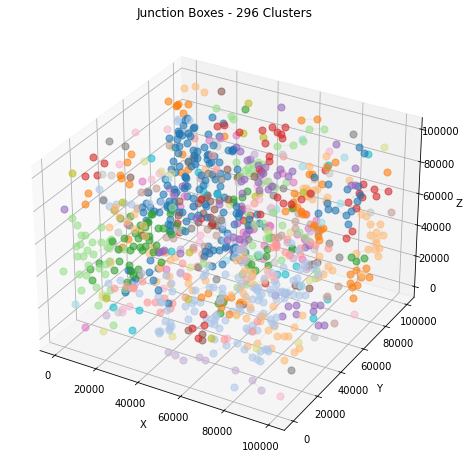

In [ ]:
# 3D scatter plot with cluster colors
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.tab20(np.linspace(0, 1, len(clusters)))
node_colors = {}
for idx, cluster in enumerate(clusters):
    for node in cluster:
        node_colors[node] = colors[idx]
for i in range(len(coordinates)):
    ax.scatter(*coordinates[i], 
              c=[node_colors[i]], 
              s=50, 
              alpha=0.6)

# Plot edges (optional - can be slow)
for i, j in list(G.edges())[:500]:  # Limit edges for visibility
    pts = np.array([coordinates[i], coordinates[j]])
    ax.plot(pts[:, 0], pts[:, 1], pts[:, 2], 
           'gray', alpha=0.2, linewidth=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Junction Boxes - {len(clusters)} Clusters')
plt.show()

### Leetcode pause:
- Redundant Connection (LC 684) https://leetcode.com/problems/redundant-connection/
- Number of Connected Components (LC 323) https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph/
- Number of Provinces (LC 547) https://leetcode.com/problems/number-of-provinces/
- Graph Valid Tree (LC 261) https://leetcode.com/problems/graph-valid-tree/
- Accounts Merge (LC 721) https://leetcode.com/problems/accounts-merge/
- Connecting Cities With Minimum Cost (LC 1135) https://leetcode.com/problems/connecting-cities-with-minimum-cost/
- Min Cost to Connect All Points (LC 1584) https://leetcode.com/problems/min-cost-to-connect-all-points/


##### 1. Redundant Connection (LC 684)
**URL:** https://leetcode.com/problems/redundant-connection/

- Problem Statement
Given a graph with `n` nodes and `n` edges, find the edge that can be removed to make the graph a tree (no cycles). If multiple answers exist, return the edge that appears last in the input.

**Input:** `edges = [[1,2],[1,3],[2,3]]`  
**Output:** `[2,3]`

- Hint
Use Union-Find to detect when adding an edge would create a cycle. The first edge that connects two already-connected nodes is the answer.


In [ ]:
# URL: https://leetcode.com/problems/redundant-connection/

class Solution:
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        parent = {}
        
        def find(x):
            if x not in parent:
                parent[x] = x
            if parent[x] != x:
                parent[x] = find(parent[x])  # Path compression
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x == root_y:
                return False  # Already connected - cycle detected!
            parent[root_x] = root_y
            return True
        
        for u, v in edges:
            if not union(u, v):
                return [u, v]



##### Number of Connected Components (LC 323)
**URL:** https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph/

- Problem Statement
Given `n` nodes labeled `0` to `n-1` and a list of undirected edges, return the number of connected components.

**Input:** `n = 5, edges = [[0,1],[1,2],[3,4]]`  
**Output:** `2` (Components: {0,1,2} and {3,4})

- Hint
Use Union-Find to merge connected nodes. Count unique root parents at the end.



In [ ]:
# URL: https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph/

class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        parent = list(range(n))
        
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x != root_y:
                parent[root_x] = root_y
        
        for u, v in edges:
            union(u, v)
        
        # Count unique roots
        return len(set(find(i) for i in range(n)))

##### Number of Provinces (LC 547) https://leetcode.com/problems/number-of-provinces/

- Problem Statement
Given an `n x n` matrix `isConnected` where `isConnected[i][j] = 1` if city `i` is directly connected to city `j`, return the total number of provinces (groups of connected cities).

**Input:** `isConnected = [[1,1,0],[1,1,0],[0,0,1]]`  
**Output:** `2`

- Hint
Treat it as a graph where `isConnected[i][j] = 1` means there's an edge. Use Union-Find or DFS.


In [ ]:
# URL: https://leetcode.com/problems/number-of-provinces/

class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        n = len(isConnected)
        parent = list(range(n))
        
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x != root_y:
                parent[root_x] = root_y
        
        # Build union-find from adjacency matrix
        for i in range(n):
            for j in range(i + 1, n):
                if isConnected[i][j] == 1:
                    union(i, j)
        
        return len(set(find(i) for i in range(n)))

##### Graph Valid Tree (LC 261)
**URL:** https://leetcode.com/problems/graph-valid-tree/

- Problem Statement
Given `n` nodes and edges, determine if the edges form a valid tree. A tree must be:
1. Connected (all nodes reachable)
2. Acyclic (no cycles)

**Input:** `n = 5, edges = [[0,1],[0,2],[0,3],[1,4]]`  
**Output:** `true`

- Hint
A tree with `n` nodes must have exactly `n-1` edges. Use Union-Find to check for cycles and connectivity.


In [ ]:
# URL: https://leetcode.com/problems/graph-valid-tree/

class Solution:
    def validTree(self, n: int, edges: List[List[int]]) -> bool:
        # Tree must have exactly n-1 edges
        if len(edges) != n - 1:
            return False
        
        parent = list(range(n))
        
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x == root_y:
                return False  # Cycle detected
            parent[root_x] = root_y
            return True
        
        for u, v in edges:
            if not union(u, v):
                return False
        
        return True

##### Accounts Merge (LC 721)
**URL:** https://leetcode.com/problems/accounts-merge/

- Problem Statement
Given a list of accounts where each account has a name and emails, merge accounts that share at least one email.

**Input:** `accounts = [["John","john@mail.com","john_newyork@mail.com"],["John","johnsmith@mail.com"],["John","john@mail.com","john_newyork@mail.com"]]`  
**Output:** `[["John","john@mail.com","john_newyork@mail.com"],["John","johnsmith@mail.com"]]`

- Hint
Use Union-Find where emails are nodes. Map emails to their owner's name.


In [ ]:
# URL: https://leetcode.com/problems/accounts-merge/

class Solution:
    def accountsMerge(self, accounts: List[List[str]]) -> List[List[str]]:
        from collections import defaultdict
        
        parent = {}
        email_to_name = {}
        
        def find(x):
            if x not in parent:
                parent[x] = x
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            parent[find(x)] = find(y)
        
        # Build union-find
        for account in accounts:
            name = account[0]
            first_email = account[1]
            for email in account[1:]:
                email_to_name[email] = name
                union(first_email, email)
        
        # Group emails by root parent
        components = defaultdict(list)
        for email in email_to_name:
            components[find(email)].append(email)
        
        # Format output
        return [[email_to_name[root]] + sorted(emails) 
                for root, emails in components.items()]

##### Min Cost to Connect All Points (LC 1584) 
**URL:** https://leetcode.com/problems/min-cost-to-connect-all-points/

- Problem Statement
Given `n` points on a 2D plane, connect all points with minimum total Manhattan distance.

**Input:** `points = [[0,0],[2,2],[3,10],[5,2],[7,0]]`  
**Output:** `20`

- Hint
This is **Minimum Spanning Tree (Kruskal's Algorithm)**. Generate all edges with distances, sort by distance, use Union-Find.

In [ ]:
# URL: https://leetcode.com/problems/min-cost-to-connect-all-points/

class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        n = len(points)
        parent = list(range(n))
        
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x != root_y:
                parent[root_x] = root_y
                return True
            return False
        
        # Generate all edges with Manhattan distance
        edges = []
        for i in range(n):
            for j in range(i + 1, n):
                dist = abs(points[i][0] - points[j][0]) + abs(points[i][1] - points[j][1])
                edges.append((dist, i, j))
        
        # Kruskal's: sort edges and add if doesn't create cycle
        edges.sort()
        total_cost = 0
        edges_added = 0
        
        for dist, u, v in edges:
            if union(u, v):
                total_cost += dist
                edges_added += 1
                if edges_added == n - 1:  # MST complete
                    break
        
        return total_cost

##### Connecting Cities With Minimum Cost (LC 1135)
**URL:** https://leetcode.com/problems/connecting-cities-with-minimum-cost/

- Problem Statement
Connect all cities with minimum cost using given edges. Return `-1` if impossible.

**Input:** `n = 3, connections = [[1,2,5],[1,3,6],[2,3,1]]`  
**Output:** `6` (Connect 2-3 and 1-2)

- Hint
Classic MST with Union-Find. Check if all nodes are connected at the end.

In [ ]:
# URL: https://leetcode.com/problems/connecting-cities-with-minimum-cost/

class Solution:
    def minimumCost(self, n: int, connections: List[List[int]]) -> int:
        parent = list(range(n + 1))
        
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x != root_y:
                parent[root_x] = root_y
                return True
            return False
        
        # Kruskal's Algorithm
        connections.sort(key=lambda x: x[2])  # Sort by cost
        total_cost = 0
        edges_used = 0
        
        for city1, city2, cost in connections:
            if union(city1, city2):
                total_cost += cost
                edges_used += 1
                if edges_used == n - 1:  # All cities connected
                    return total_cost
        
        return -1  # Not all cities can be connected



| Problem | Pattern | Key Concept |
|---------|---------|-------------|
| **684 - Redundant Connection** | Cycle Detection  | Find edge creating cycle |
| **323 - Connected Components** | Component Counting  | Count unique roots |
| **547 - Number of Provinces** | Component Counting  | Adjacency matrix → Union-Find |
| **261 - Graph Valid Tree** | Tree Validation  | Must have `n-1` edges + no cycles |
| **721 - Accounts Merge** | Grouping  | Merge by common emails |
| **1584 - Min Cost Connect All** | MST (Kruskal)  | Manhattan distance MST |
| **1135 - Connecting Cities** | MST (Kruskal)  | Standard MST with edges given |



* Key Takeaways

1. **Union-Find Template:**
   - `find(x)` with path compression
   - `union(x, y)` to merge components
   - Count unique roots for components

2. **MST (Kruskal's):**
   - Sort edges by weight
   - Add edge if doesn't create cycle
   - Stop when `n-1` edges added

3. **Tree Properties:**
   - Must have exactly `n-1` edges
   - Must be connected (1 component)
   - No cycles

In [113]:
import numpy as np
import heapq
from collections import Counter

with open("input_day8.txt", "r") as f:
    coordinates = np.array([list(map(int, line.strip().split(","))) for line in f])

n = len(coordinates)
edges = []
for i in range(n):
    for j in range(i + 1, n):
        distance = np.linalg.norm(coordinates[i] - coordinates[j])
        heapq.heappush(edges, (distance, tuple(coordinates[i]), tuple(coordinates[j])))

parent = {tuple(point): tuple(point) for point in coordinates}

def find(point):
    if parent[point] != point:
        parent[point] = find(parent[point])  
    return parent[point]

# 1000 closest pairs
for _ in range(1000):
    distance,  point1, point2 = heapq.heappop(edges)
    root1, root2 = find(point1), find(point2)
    if root1 != root2:
        parent[root2] = root1

#  3 largest clusters
cluster_sizes = Counter(find(pt) for pt in parent.keys())
p1 = np.prod(sorted(cluster_sizes.values(), reverse=True)[:3])
print(p1)


while len(edges) > 0:
    distance,  point1, point2 = heapq.heappop(edges)
    root1, root2 = find(point1), find(point2)
    if root1 != root2:
        parent[root2] = root1
    
    cluster_sizes = Counter(find(pt) for pt in parent.keys())
    if len(cluster_sizes) == 2:
        # 2 clusters remain
        break

#  closest point between the two clusters
cluster_roots = list(cluster_sizes.keys())
last_point = np.array(cluster_roots[1])
distances = np.linalg.norm(coordinates - last_point, axis=1)
distances[distances == 0] = np.inf  # remove itself
p2 = int(float(last_point[0]) * coordinates[np.argmin(distances)][0])
print(p2)

67488
3767453340


In [ ]:
# solution from discord:
import numpy as np
from scipy.cluster.hierarchy import DisjointSet
from scipy.spatial.distance import cdist
 
P = [np.array(l.split(","), int) for l in open("input_day8.txt")]

#   edges sorted by distance
D = sorted((np.linalg.norm(u - v), tuple(u), tuple(v)) 
           for i, u in enumerate(P) for v in P[i+1:])


C = DisjointSet(map(tuple, P))

# Merge edges and check both conditions
for i, (_, u, v) in enumerate(D):
    C.merge(u, v)
    
    # Part 1: After 1000 connections
    if i == 999:
        p1 = np.prod(sorted(map(len, C.subsets()))[-3:])  # 3 largest clusters
    
    # Part 2: When exactly 2 clusters remain
    if len(C.subsets()) == 2:
        clusters = list(C.subsets())
        c1 = np.array(list(clusters[0]))
        c2 = np.array(list(clusters[1]))
        
        #  closest bridge points
        dists = cdist(c1, c2)
        idx = np.unravel_index(np.argmin(dists), dists.shape)
        p2 = int(c1[idx[0]][0]) * int(c2[idx[1]][0])
        break

print(f"Part 1: {p1}")
print(f"Part 2: {p2}")


Part 1: 67488
Part 2: 3767453340


### Problem 9: 
Find the biggest rectangle of 1s in a binary matrix, from the hypotenuse . Return its area.

In [2]:
with open('input_day9.txt', 'r') as file:
    coordinates = file.readlines()
coordinates = [ tuple(map(int,cord.strip().split(","))) for cord in coordinates]
coordinates[:5]

[(97985, 50331),
 (97985, 51551),
 (98098, 51551),
 (98098, 52782),
 (98273, 52782)]

In [ ]:
largest_surface = 0 #4715966250
largest_p1, largest_p2 = None, None
for p1 in coordinates:
    for p2 in coordinates:
        surface = (abs(p2[0]-p1[0])+1)*(abs(p2[1]-p1[1])+1)
        largest_surface = max(largest_surface, surface)
        largest_p1, largest_p2 = p1, p2 
largest_surface

4715966250

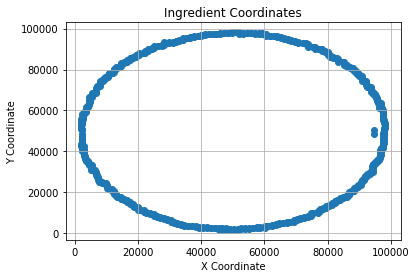

In [26]:
# plot coordinates
import matplotlib.pyplot as plt
x_coords = [p[0] for p in coordinates]
y_coords = [p[1] for p in coordinates]
plt.scatter(x_coords, y_coords)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Ingredient Coordinates')
plt.grid(True)


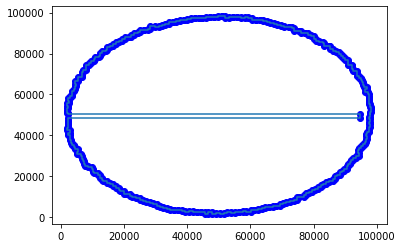

In [31]:
# part 2
# method 1: using shapely
from shapely.geometry import Polygon, box
polygon = Polygon(coordinates)
# plot
import matplotlib.pyplot as plt
x,y = polygon.exterior.xy
#plt.fill(x, y, alpha=0.5, fc='r', ec='black')
plt.plot(x,y)
plt.scatter([p[0] for p in coordinates], [p[1] for p in coordinates], color='blue')
plt.show()

In [1]:
from shapely.geometry import Polygon, box
# check if rectange inside polygon
with open('input_day9.txt', 'r') as file:
    coordinates = file.readlines()
coordinates = [ tuple(map(int,cord.strip().split(","))) for cord in coordinates]

def is_valid_rectangle(p1, p2, polygon):
    # box(minx, miny, maxx, maxy)
    rect = box(min(p1[0], p2[0]), min(p1[1], p2[1]), max(p1[0], p2[0]), max(p1[1], p2[1]))
    return polygon.contains(rect)
def surface(p1, p2):
    return (abs(p2[0]-p1[0])+1)*(abs(p2[1]-p1[1])+1)
from itertools import combinations
largest_surface = 0
polygon = Polygon(coordinates)
for p1, p2 in combinations(coordinates, 2):
    if is_valid_rectangle(p1, p2, polygon):
        area = surface(p1,p2)
        largest_surface = max(largest_surface, area)
largest_surface


1530527040

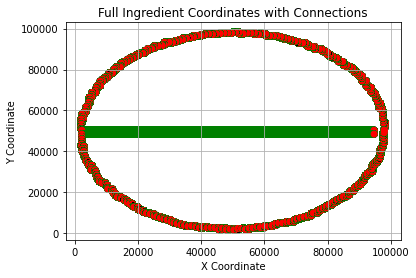

In [8]:
# part 2: add connecting tiles
# coordinates = [(7,6), (10,6), (10,3), (2,3), (2,1), (6,1), (9,5), (9,7)]

full_coordinates = []
for i in range(len(coordinates)-1):
    if coordinates[i][0]==coordinates[i+1][0]:
        # vertical line
        # add type of points (green or red )
        x = coordinates[i][0]
        y_start = min(coordinates[i][1], coordinates[i+1][1])
        y_end = max(coordinates[i][1], coordinates[i+1][1])
        for y in range(y_start+1, y_end  ):
            full_coordinates.append((x, y, "green"))
        full_coordinates.append((x, y_end, "red"))
        full_coordinates.append((x, y_start, "red"))
    elif coordinates[i][1]==coordinates[i+1][1]:
        # horizontal line
        y = coordinates[i][1]
        x_start = min(coordinates[i][0], coordinates[i+1][0])
        x_end = max(coordinates[i][0], coordinates[i+1][0])
        for x in range(x_start+1, x_end  ):
            full_coordinates.append((x, y, "green"))
        full_coordinates.append((x_end, y, "red"))
        full_coordinates.append((x_start, y, "red"))
# close loop:
full_coordinates.append((coordinates[0][0], coordinates[0][1], "red"))

# vizualize full coordinates with red or green points
import matplotlib.pyplot as plt
x_coords = [p[0] for p in full_coordinates]
y_coords = [p[1] for p in full_coordinates]
colors = [p[2] for p in full_coordinates]
plt.scatter(x_coords, y_coords, c=colors)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Full Ingredient Coordinates with Connections')
plt.grid(True)


In [28]:
from itertools import combinations

# Create map of horizontal and vertical segments formed by the points.
hsegs, vsegs = {}, {}
for (px,py), (qx,qy) in zip(coordinates, coordinates[1:]+[coordinates[0]]):
    if px==qx:   vsegs[px] = (min(py,qy),max(py,qy))   # vertical segment
    elif py==qy: hsegs[py] = (min(px,qx),max(px,qx))   # horizontal segment
def area(p,q): return (1+abs(p[0]-q[0]))*(1+abs(p[1]-q[1]))
# Check to see if any line segments go inside the candidate rectangle.
# At the moment we check all segments - could be sped up with a binary search. 
def is_valid(p,q):
    L, R = min(p[0],q[0]), max(p[0],q[0])
    T, B = min(p[1],q[1]), max(p[1],q[1])
    for x, (segT, segB) in vsegs.items():
        if L<x<R and segB>T and segT<B:
            return False
    for y, (segL, segR) in hsegs.items():
        if T<y<B and segR>L and segL<B:
            return False
    return True

# Find the maximum area of all valid rectangles.
maxarea = max(area(p,q) for p,q in combinations(coordinates, 2) if is_valid(p,q))
print("Part 2:", maxarea)

Part 2: 1530527040


In [2]:
largest_surface

1530527040

In [4]:
from itertools import combinations

with open('input_day9.txt', 'r') as file:
    coordinates = [tuple(map(int, line.strip().split(","))) for line in file]

hsegs = {}  # horizontal segments: {y: (x_start, x_end)}
vsegs = {}  # vertical segments: {x: (y_start, y_end)}

for i in range(len(coordinates)):
    p1 = coordinates[i]
    p2 = coordinates[(i + 1) % len(coordinates)] 
    if p1[0] == p2[0]:  
        vsegs[p1[0]] = (min(p1[1], p2[1]), max(p1[1], p2[1]))
    elif p1[1] == p2[1]: 
        hsegs[p1[1]] = (min(p1[0], p2[0]), max(p1[0], p2[0]))

def ranges_overlap(a, b, c, d):
    """Check if [a,b] overlaps with [c,d]"""
    return max(a, c) <= min(b, d)

def is_valid_segment_check(p, q):
    L, R = min(p[0], q[0]), max(p[0], q[0])
    T, B = min(p[1], q[1]), max(p[1], q[1])
    #  vertical segments
    for x, (segT, segB) in vsegs.items():
        if L < x < R and ranges_overlap(segT, segB, T, B):
            return False
    #  horizontal segments
    for y, (segL, segR) in hsegs.items():
        if T < y < B and ranges_overlap(segL, segR, L, R):
            return False
    return True



max_area = 0
for p, q in combinations(coordinates, 2):
    if is_valid_segment_check(p, q):
        max_area = max(max_area, surface(p, q))

print(f"Part 2 (Segment Check): {max_area}")

Part 2 (Segment Check): 1529618461


In [ ]:
from itertools import combinations
from bisect import bisect_left, bisect_right
# generated scanline idea
with open('input_day9.txt', 'r') as file:
    coordinates = [tuple(map(int, line.strip().split(","))) for line in file]

# Build segment maps with SORTED keys for binary search
hsegs = {}  # {y: (x_start, x_end)}
vsegs = {}  # {x: (y_start, y_end)}

for i in range(len(coordinates)):
    p1 = coordinates[i]
    p2 = coordinates[(i + 1) % len(coordinates)]
    
    if p1[0] == p2[0]:  # Vertical
        vsegs[p1[0]] = (min(p1[1], p2[1]), max(p1[1], p2[1]))
    elif p1[1] == p2[1]:  # Horizontal
        hsegs[p1[1]] = (min(p1[0], p2[0]), max(p1[0], p2[0]))

# Convert to sorted lists for binary search
vseg_xs = sorted(vsegs.keys())
hseg_ys = sorted(hsegs.keys())

def ranges_overlap(a, b, c, d):
    """Check if [a,b] overlaps with [c,d]"""
    return max(a, c) <= min(b, d)

def is_valid_scanline(p, q):
    L, R = min(p[0], q[0]), max(p[0], q[0])
    T, B = min(p[1], q[1]), max(p[1], q[1])
    
    # Binary search: Find vertical segments strictly between L and R
    left_idx = bisect_right(vseg_xs, L)   # First x > L
    right_idx = bisect_left(vseg_xs, R)   # Last x < R
    
    for i in range(left_idx, right_idx):
        x = vseg_xs[i]
        segT, segB = vsegs[x]
        if ranges_overlap(segT, segB, T, B):
            return False
    
    # Binary search: Find horizontal segments strictly between T and B
    top_idx = bisect_right(hseg_ys, T)
    bottom_idx = bisect_left(hseg_ys, B)
    
    for i in range(top_idx, bottom_idx):
        y = hseg_ys[i]
        segL, segR = hsegs[y]
        if ranges_overlap(segL, segR, L, R):
            return False
    
    return True

def area(p, q):
    return (1 + abs(p[0] - q[0])) * (1 + abs(p[1] - q[1]))

# Find maximum valid rectangle
max_area = 0
for p, q in combinations(coordinates, 2):
    if is_valid_scanline(p, q):
        max_area = max(max_area, area(p, q))

print(f"Part 2 (Scanline): {max_area}")

Part 2 (Scanline): 1529618461


### Problem 10:
[.##.] (3) (1,3) (2) (2,3) (0,2) (0,1) {3,5,4,7}

[...#.] (0,2,3,4) (2,3) (0,4) (0,1,2) (1,2,3,4) {7,5,12,7,2}

[.###.#] (0,1,2,3,4) (0,3,4) (0,1,2,4,5) (1,2) {10,11,11,5,10,5}

The manual describes one machine per line. Each line contains a single indicator light diagram in [square brackets], one or more button wiring schematics in (parentheses), and joltage requirements in {curly braces}.
You need to initialize factory machines by configuring their indicator lights. Each machine has:

Indicator lights (initially all OFF)
Buttons that toggle specific lights
A target configuration you must achieve
Goal: Find the minimum number of button presses needed to configure all machines.



In [3]:
# example:*
import re
example =  "[.##.] (3) (1,3) (2) (2,3) (0,2) (0,1)"
#def single_line_parse(example):
#    # Split by spaces
parts = example.split() 
lights = parts[0][1:-1]  # remove [ and ]
possible_moves = []
# between parentheses
for part in parts[1:]:
    match = re.match(r'\((.*?)\)', part)
    if match:
        move = match.group(1)
        if ',' in move:
            possible_moves.append(tuple(map(int, move.split(','))))
        else:
            possible_moves.append(int(move))
# pressing
from itertools import product
pressing_options = list(product([0, 1], repeat=len(possible_moves)))



In [11]:
# parse input into matrix

with open('input_day10.txt', 'r') as file:
    grid = file.readlines()
lightings = []
all_moves = []
for example in grid:
    parts = example.split() 
    lights = parts[0][1:-1]  # remove [ and ]
    possible_moves = []
    # between parentheses
    for part in parts[1:]:
        match = re.match(r'\((.*?)\)', part)
        if match:
            move = match.group(1)
            if ',' in move:
                possible_moves.append(tuple(map(int, move.split(','))))
            else:
                possible_moves.append(int(move))
    lightings.append([1 if c == '#' else 0 for c in lights] )
    all_moves.append(possible_moves)


In [12]:
lightings

[[0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0],
 [0, 0, 1, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 1, 0, 0, 1, 1],
 [1, 1, 1, 0, 0, 1],
 [0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 1],
 [1, 1, 0, 1],
 [1, 1, 0, 0, 1, 0],
 [0, 1, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 1, 1],
 [1, 0, 1, 1, 0, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0],
 [1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
 [1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
 [1, 1, 1, 0],
 [0, 0, 1, 1, 1],
 [0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 0, 1, 0, 1],
 [0, 1, 0, 0, 1, 1, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 1],
 [0, 1, 1, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 0, 1],
 [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 1],
 [0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 1, 1, 1],
 [1, 1, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
 [1, 1, 0, 1, 0],
 [0, 0, 1, 1,

In [13]:

def build_matrix(target, buttons):
    """
    Build coefficient matrix A where:
    A[i][j] = 1 if button j toggles light i
    
    Args:
        target: list of ints [0,1,1,0,...] - desired light states
        buttons: list of button configs - each is int or tuple
    
    Returns:
        A: 2D list (n_lights × n_buttons)
        b: target vector (list)
    """
    n_lights = len(target)
    n_buttons = len(buttons)
    
    # Initialize matrix with zeros
    A = [[0] * n_buttons for _ in range(n_lights)]
    
    # Fill matrix: A[light][button] = 1 if button affects light
    for button_idx, button in enumerate(buttons):
        # Handle both single int and tuple
        if isinstance(button, int):
            affected_lights = [button]
        else:
            affected_lights = button
        
        # Mark affected lights
        for light_idx in affected_lights:
            A[light_idx][button_idx] = 1
    
    return A, target



In [14]:
import re
from sympy import Matrix, GF
from itertools import product



def solve_gf2_system(A, b):
    """
    Solve A × x = b in GF(2) using SymPy.
    
    Returns:
        List of all solution vectors (as lists of 0/1)
        Empty list if no solution exists
    """
    n_lights = len(A)
    n_buttons = len(A[0])
    
    # Convert to SymPy Matrix over GF(2)
    A_sym = Matrix(A).applyfunc(lambda x: GF(2)(x))
    b_sym = Matrix(b).applyfunc(lambda x: GF(2)(x))
    
    # Create augmented matrix [A | b]
    augmented = A_sym.row_join(b_sym)
    
    # Row reduce to RREF
    rref_matrix, pivot_cols = augmented.rref()
    
    # Check consistency: look for row [0 0 0 ... | 1]
    for row in range(n_lights):
        # All coefficients zero but RHS is 1 → inconsistent
        all_zero = all(rref_matrix[row, col] == GF(2)(0) for col in range(n_buttons))
        if all_zero and rref_matrix[row, n_buttons] == GF(2)(1):
            return []  # No solution
    
    # Find free variables (columns not in pivot_cols)
    free_vars = [i for i in range(n_buttons) if i not in pivot_cols]
    
    # Generate all solutions by trying all free variable combinations
    solutions = []
    
    for free_values in product([0, 1], repeat=len(free_vars)):
        solution = [0] * n_buttons
        
        # Set free variables
        for idx, var_idx in enumerate(free_vars):
            solution[var_idx] = free_values[idx]
        
        # Back-substitute to find pivot variables
        for row in range(min(len(pivot_cols), n_lights)):
            if row >= len(pivot_cols):
                break
            
            pivot_col = pivot_cols[row]
            
            # Calculate: pivot_var = RHS ⊕ (sum of non-pivot contributions)
            val = int(rref_matrix[row, n_buttons])  # RHS
            
            for col in range(n_buttons):
                if col != pivot_col:
                    val ^= (int(rref_matrix[row, col]) * solution[col])
            
            solution[pivot_col] = val
        
        solutions.append(solution)
    
    return solutions


# ============================================
# STEP 3: FIND MINIMUM PRESSES
# ============================================

def min_presses_for_machine(target, buttons):
    """
    Find minimum button presses for one machine.
    """
    A, b = build_matrix(target, buttons)
    solutions = solve_gf2_system(A, b)
    
    if not solutions:
        return float('inf')  # No solution (shouldn't happen)
    
    # Return minimum number of button presses
    return min(sum(sol) for sol in solutions)


# ============================================
# STEP 4: SOLVE ALL MACHINES
# ============================================

total_presses = 0

for machine_idx, (target, buttons) in enumerate(zip(lightings, all_moves)):
    presses = min_presses_for_machine(target, buttons)
    print(f"Machine {machine_idx + 1}: {presses} presses")
    total_presses += presses

print(f"\n🎯 Total minimum presses: {total_presses}")

Machine 1: -32 presses
Machine 2: 0 presses
Machine 3: inf presses
Machine 4: -1 presses
Machine 5: 0 presses
Machine 6: -6 presses
Machine 7: 1 presses
Machine 8: 1 presses
Machine 9: 1 presses
Machine 10: inf presses
Machine 11: inf presses
Machine 12: inf presses
Machine 13: 2 presses
Machine 14: 1 presses
Machine 15: 1 presses
Machine 16: 1 presses
Machine 17: inf presses
Machine 18: -26 presses
Machine 19: inf presses
Machine 20: 0 presses
Machine 21: 1 presses
Machine 22: 0 presses
Machine 23: 0 presses
Machine 24: 1 presses
Machine 25: -4 presses
Machine 26: 1 presses
Machine 27: 1 presses
Machine 28: 0 presses
Machine 29: 1 presses
Machine 30: 1 presses
Machine 31: inf presses
Machine 32: inf presses
Machine 33: 1 presses
Machine 34: 1 presses
Machine 35: 1 presses
Machine 36: -11 presses
Machine 37: inf presses
Machine 38: 1 presses
Machine 39: 0 presses
Machine 40: 6 presses
Machine 41: 1 presses
Machine 42: -5 presses
Machine 43: -5 presses
Machine 44: 0 presses
Machine 45: 

In [16]:

total_presses = 0

for machine_idx, (target, buttons) in enumerate(zip(lightings, all_moves)):
    presses = min_presses_for_machine(target, buttons)
    print(f"Machine {machine_idx + 1}: {presses} presses")
    total_presses += presses

print(f"\n🎯 Total minimum presses: {total_presses}")

Machine 1: 4 presses
Machine 2: 1 presses
Machine 3: inf presses
Machine 4: 5 presses
Machine 5: 2 presses
Machine 6: 1 presses
Machine 7: 1 presses
Machine 8: 1 presses
Machine 9: 3 presses
Machine 10: inf presses
Machine 11: inf presses
Machine 12: inf presses
Machine 13: 2 presses
Machine 14: 3 presses
Machine 15: 7 presses
Machine 16: 3 presses
Machine 17: inf presses
Machine 18: 4 presses
Machine 19: inf presses
Machine 20: 3 presses
Machine 21: 1 presses
Machine 22: 2 presses
Machine 23: 1 presses
Machine 24: 1 presses
Machine 25: 2 presses
Machine 26: 3 presses
Machine 27: 1 presses
Machine 28: 0 presses
Machine 29: 3 presses
Machine 30: 1 presses
Machine 31: inf presses
Machine 32: inf presses
Machine 33: 1 presses
Machine 34: 1 presses
Machine 35: 3 presses
Machine 36: 3 presses
Machine 37: inf presses
Machine 38: 9 presses
Machine 39: 1 presses
Machine 40: 4 presses
Machine 41: 1 presses
Machine 42: 2 presses
Machine 43: 5 presses
Machine 44: 2 presses
Machine 45: 1 presses
M

In [15]:
def solve_gf2_system(A, b):
    """
    Solve A × x = b in GF(2) using SymPy.
    
    Returns:
        List of all solution vectors (as lists of 0/1)
        Empty list if no solution exists
    """
    n_lights = len(A)
    n_buttons = len(A[0])
    
    # Convert to SymPy Matrix over GF(2)
    A_sym = Matrix(A).applyfunc(lambda x: GF(2)(x))
    b_sym = Matrix(b).applyfunc(lambda x: GF(2)(x))
    
    # Create augmented matrix [A | b]
    augmented = A_sym.row_join(b_sym)
    
    # Row reduce to RREF
    rref_matrix, pivot_cols = augmented.rref()
    
    # ✅ FIX 1: Check actual RREF rows (not n_lights)
    for row in range(rref_matrix.rows):
        all_zero = all(rref_matrix[row, col] == GF(2)(0) for col in range(n_buttons))
        if all_zero and rref_matrix[row, n_buttons] == GF(2)(1):
            return []  # No solution
    
    # Find free variables
    free_vars = [i for i in range(n_buttons) if i not in pivot_cols]
    
    # Generate all solutions
    solutions = []
    
    for free_values in product([0, 1], repeat=len(free_vars)):
        solution = [0] * n_buttons
        
        # Set free variables
        for idx, var_idx in enumerate(free_vars):
            solution[var_idx] = free_values[idx]
        
        # Back-substitute
        for row in range(min(len(pivot_cols), rref_matrix.rows)):
            if row >= len(pivot_cols):
                break
            
            pivot_col = pivot_cols[row]
            
            # ✅ FIX 2: Use modulo 2 to ensure 0 or 1
            val = int(rref_matrix[row, n_buttons])
            
            for col in range(n_buttons):
                if col != pivot_col:
                    val ^= (int(rref_matrix[row, col]) * solution[col])
            
            solution[pivot_col] = val % 2  # ✅ Force 0 or 1
        
        solutions.append(solution)
    
    return solutions

In [17]:
total_presses = 0
unsolvable_count = 0

for machine_idx, (target, buttons) in enumerate(zip(lightings, all_moves)):
    presses = min_presses_for_machine(target, buttons)
    
    if presses == float('inf'):
        print(f"Machine {machine_idx + 1}: ❌ UNSOLVABLE")
        unsolvable_count += 1
    else:
        print(f"Machine {machine_idx + 1}: {presses} presses")
        total_presses += presses

print(f"\n🎯 Total minimum presses: {total_presses}")
print(f"⚠️  Unsolvable machines: {unsolvable_count}")

Machine 1: 4 presses
Machine 2: 1 presses
Machine 3: ❌ UNSOLVABLE
Machine 4: 5 presses
Machine 5: 2 presses
Machine 6: 1 presses
Machine 7: 1 presses
Machine 8: 1 presses
Machine 9: 3 presses
Machine 10: ❌ UNSOLVABLE
Machine 11: ❌ UNSOLVABLE
Machine 12: ❌ UNSOLVABLE
Machine 13: 2 presses
Machine 14: 3 presses
Machine 15: 7 presses
Machine 16: 3 presses
Machine 17: ❌ UNSOLVABLE
Machine 18: 4 presses
Machine 19: ❌ UNSOLVABLE
Machine 20: 3 presses
Machine 21: 1 presses
Machine 22: 2 presses
Machine 23: 1 presses
Machine 24: 1 presses
Machine 25: 2 presses
Machine 26: 3 presses
Machine 27: 1 presses
Machine 28: 0 presses
Machine 29: 3 presses
Machine 30: 1 presses
Machine 31: ❌ UNSOLVABLE
Machine 32: ❌ UNSOLVABLE
Machine 33: 1 presses
Machine 34: 1 presses
Machine 35: 3 presses
Machine 36: 3 presses
Machine 37: ❌ UNSOLVABLE
Machine 38: 9 presses
Machine 39: 1 presses
Machine 40: 4 presses
Machine 41: 1 presses
Machine 42: 2 presses
Machine 43: 5 presses
Machine 44: 2 presses
Machine 45: 1 

In [18]:
import re
from sympy import Matrix, GF
from itertools import product

def parse_line(line):
    lights = [1 if c == '#' else 0 for c in re.search(r'\[([.#]+)\]', line).group(1)]
    buttons = []
    for match in re.finditer(r'\(([0-9,]+)\)', line):
        nums = match.group(1).split(',')
        buttons.append(tuple(map(int, nums)) if len(nums) > 1 else int(nums[0]))
    return lights, buttons

def solve_machine(target, buttons):
    n_lights = len(target)
    n_buttons = len(buttons)
    
    # Build matrix: A[i][j] = 1 if button j toggles light i
    A = [[0] * n_buttons for _ in range(n_lights)]
    for j, btn in enumerate(buttons):
        for light in (btn if isinstance(btn, tuple) else [btn]):
            A[light][j] = 1
    
    # Solve in GF(2)
    A_sym = Matrix(A).applyfunc(lambda x: GF(2)(x))
    b_sym = Matrix(target).applyfunc(lambda x: GF(2)(x))
    augmented = A_sym.row_join(b_sym)
    rref, pivots = augmented.rref()
    
    # Check for no solution
    for row in range(rref.rows):
        if all(rref[row, col] == GF(2)(0) for col in range(n_buttons)):
            if rref[row, n_buttons] == GF(2)(1):
                return float('inf')
    
    # Find all solutions
    free_vars = [i for i in range(n_buttons) if i not in pivots]
    min_presses = float('inf')
    
    for free_vals in product([0, 1], repeat=len(free_vars)):
        sol = [0] * n_buttons
        for idx, var in enumerate(free_vars):
            sol[var] = free_vals[idx]
        
        for row in range(min(len(pivots), rref.rows)):
            if row >= len(pivots):
                break
            pivot = pivots[row]
            val = int(rref[row, n_buttons])
            for col in range(n_buttons):
                if col != pivot:
                    val ^= int(rref[row, col]) * sol[col]
            sol[pivot] = val % 2
        
        min_presses = min(min_presses, sum(sol))
    
    return min_presses

# Main
with open('input_day10.txt') as f:
    total = 0
    for line in f:
        target, buttons = parse_line(line.strip())
        presses = solve_machine(target, buttons)
        total += presses if presses != float('inf') else 0
    
    print(total)

335


In [ ]:
from collections import defaultdict
#Parse input into a directed graph (adjacency list)
#DFS with backtracking to explore all paths
#Visited set prevents cycles within a single path
#Backtrack by removing from visited set to allow node reuse in different paths
#Base case: reaching "out" counts as 1 path
def count_paths(graph, start, end, visited=None):
    if visited is None:
        visited = set()
    
    if start == end:
        return 1
    
    visited.add(start)
    total = 0
    
    for neighbor in graph.get(start, []):
        if neighbor not in visited:
            total += count_paths(graph, neighbor, end, visited)
    
    visited.remove(start)  # Backtrack
    return total

# Parse input
graph = defaultdict(list)
with open('input_day11.txt') as f:
    for line in f:
        device, outputs = line.strip().split(': ')
        graph[device] = outputs.split()

# Count paths from "you" to "out"
result = count_paths(graph, "you", "out")
print(result)

772


## Monotone chain (Andrew's algorithm), Online mean and variance, Reservoir sampling
- Monotone chain (Andrew's algorithm) for convex hull
- Online mean and variance calculation
- Reservoir sampling for random sampling from a stream
  

In [26]:
def cross(o,a,b):
    return (a[0]-o[0])*(b[1]-o[1]) - (a[1]-o[1])*(b[0]-o[0])
# first sort
# get lower and upper using cross
def convex_hull(points,keep_collinear =  False):
    pts = sorted(set(points))
    if len(pts)<=2:
        return pts
    def pop_it(o,a,b, keep_collinear = keep_collinear):
        c = cross(o,a,b)
        return (c>= 0 if keep_collinear else c>0)
    lower = []
    upper = []
    for p in pts:
        while len(lower)>=2 and pop_it(lower[-2],lower[-1],p):
            lower.pop()
        lower.append(p)
    upper = []
    for p in reversed(pts):
        while len(upper)>=2 and pop_it(upper[-2],upper[-1],p):
            upper.pop()
        upper.append(p)
    return lower[:-1]+upper[:-1]

In [27]:
convex_hull([(0,0),(4,0),(4,4),(2,1),(0,4),(1,2),(3,2)])

[(0, 0), (0, 4), (4, 4), (4, 0)]

###### Prompt

Implement an online estimator for mean and variance over a stream of floats.

Requirements:

* `update(x)` processes one observation in **O(1)** time and memory.
* `mean` is always defined after ≥1 update.
* `variance(sample=True)` returns:

  * sample variance (divide by `n-1`) if `sample=True`
  * population variance (divide by `n`) if `sample=False`
* If variance is undefined (`n < 2` for sample), return `float("nan")`.


In [ ]:
import math
class OnlineMeanVar:
    def __init__(self):
        self.n = 0
        self.mean = 0.0
        self.M2 = 0.0  # sum of squared div from running mean

    def update(self, x: float) -> None:
        self.n +=1
        old_diff = (x - self.mean)
        self.mean = (self.mean * (self.n-1) + x)/(self.n)
        # running sum of squared deviations from the current mean
        new_diff = (x - self.mean)
        self.M2 =self.M2+ old_diff*new_diff
 

    def variance(self, sample: bool = True) -> float:
        if self.n == 1:
            return 0.0
        if self.n <2 :
            return float("nan")
        if sample:
            return self.M2/(self.n-1)
        else:
            return self.M2/self.n

    def std(self, sample: bool = True) -> float:
        v = self.variance(sample = sample)
        return math.sqrt(v) if not math.isnan(v) else float("nan")



In [30]:
import random
from typing import Generic, List, TypeVar

T = TypeVar("T")

class ReservoirSampler(Generic[T]):
    def __init__(self, k: int, seed: int = 0):
        self.k = k
        self.rng = random.Random(seed)
        self.n = 0
        self.result = []
 
    def update(self, item: T) -> None:
        self.n +=1
        if len(self.result)<self.k:
            self.result.append(item)
            return # important
        # new samples should have same proba to be one of the k samples as the previous
        # when we reach nth element bigger than k the proba for each element to be in k is k/n
        # so idea is to sample 0 to n: if we get under k we place one of the tings there
        replacer = self.rng.randint(0, self.n-1)   
        if  replacer <self.k:
            self.result[replacer] = item
    def sample(self) -> List[T]:
        return list(self.result)


In [31]:
def test_k0():
    rs = ReservoirSampler(k=0, seed=0)
    for i in range(1, 101):
        rs.update(i)
    assert rs.sample() == []

def test_less_than_k():
    rs = ReservoirSampler(k=10, seed=0)
    for x in ["a", "b", "c"]:
        rs.update(x)
    assert rs.sample() == ["a", "b", "c"]

def test_deterministic_seed0():
    rs = ReservoirSampler(k=3, seed=0)
    for i in range(1, 11):
        rs.update(i)
    assert rs.sample() == [6, 2, 7]

def test_deterministic_seed1():
    rs = ReservoirSampler(k=5, seed=1)
    for i in range(1, 21):
        rs.update(i)
    assert rs.sample() == [19, 10, 3, 17, 9]

def test_size_invariant():
    rs = ReservoirSampler(k=4, seed=123)
    for i in range(3):
        rs.update(i)
    assert len(rs.sample()) == 3
    for i in range(3, 50):
        rs.update(i)
    assert len(rs.sample()) == 4

def run_all():
    test_k0()
    test_less_than_k()
    test_deterministic_seed0()
    test_deterministic_seed1()
    test_size_invariant()
    print("pass")

if __name__ == "__main__":
    run_all()


pass


[(-19, -15), (-18, -19), (-6, -19), (1, -20), (20, 5), (20, 5), (19, 17), (-4, 18), (-7, 18), (-10, 19), (-19, -15)]
[(-19, -15), (-18, -19), (-6, -19), (1, -20), (20, 5), (19, 17), (-4, 18), (-7, 18), (-10, 19)]
[(-19, -15), (-18, -19), (-6, -19), (1, -20), (20, 5), (20, 5), (19, 17), (-4, 18), (-7, 18), (-10, 19), (-19, -15)]


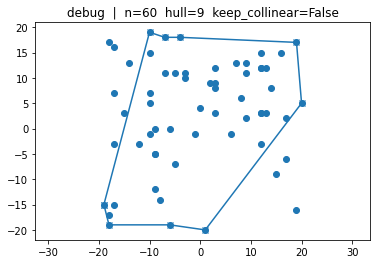

In [16]:
pts =  rand_points(60, -20, 20, seed=2)
print(convex_hull(pts, keep_collinear=False))
plot_points_and_hull("debug", pts)


 **online covariance + correlation with merge**.


Implement `OnlineCovCorr` for a stream of pairs `(x, y)`:

Requirements:

* `update(x, y)` in **O(1)** time, **O(1)** memory
* `cov(sample=True)` returns sample covariance (`/ (n-1)`) or population covariance (`/ n`)
* `corr()` returns correlation
* `merge(other)` combines two independent accumulators (needed for partitioned data)
* For undefined cases: return `float("nan")` (e.g., `n < 2` for sample cov/corr; `std==0` for corr)


In [ ]:
import math

class OnlineCovCorr:
    def __init__(self):
        self.n = 0
        self.mean_x = 0.0
        self.mean_y = 0.0
        self.M2_x = 0.0   # sum of squared deviations for x
        self.M2_y = 0.0   # sum of squared deviations for y
        self.C = 0.0      # sum of product deviations (cov numerator accumulator)

    def update(self, x: float, y: float) -> None:
        self.n += 1
        old_x = self.mean_x 
        self.mean_x = (old_x*(self.n-1)+x)/self.n
        old_y = self.mean_y 
        self.mean_y = (old_y*(self.n-1)+y)/self.n
        self.M2_x += (x-old_x)*(x-self.mean_x)
        self.M2_y += (y-old_y)*(y-self.mean_y)
        #self.C += (x-old_x)*(y-old_y) # im not sure  about this one
        self.C += (x - old_x) * (y - self.mean_y) # im not sure  about this one either


    def var_x(self, sample: bool = True) -> float:
        if self.n == 0:
            return float("nan")
        if sample:
            return self.M2_x / (self.n - 1) if self.n >= 2 else float("nan")
        return self.M2_x / self.n

    def var_y(self, sample: bool = True) -> float:
        if self.n == 0:
            return float("nan")
        if sample:
            return self.M2_y / (self.n - 1) if self.n >= 2 else float("nan")
        return self.M2_y / self.n

    def cov(self, sample: bool = True) -> float:
        if self.n == 0:
            return float("nan")
        if sample:
            return  self.C /(self.n - 1) if self.n >= 2 else float("nan")
        return self.C / self.n



    def corr(self) -> float:
        if self.n == 0:
            return float("nan")
        if self.M2_x == 0 or self.M2_y == 0:
            return float("nan")
        return self.C/(math.sqrt(self.M2_x)*math.sqrt(self.M2_y))

    def merge(self, other: "OnlineCovCorr") -> None:
        #counts (n)
        #means (mean_x, mean_y)
        #second-moment accumulators (M2_x, M2_y)
        #cross-deviation accumulator (C) for covariance
        # like we have two streams:

        delta_x = other.mean_x - self.mean_x
        delta_y = other.mean_y - self.mean_y
        old_n = self.n 
        old_n2 = other.n
        self.n = old_n + old_n2
        self.mean_x = (self.mean_x*old_n+ other.mean_x*old_n2)/(self.n)
        self.mean_y = (self.mean_y*old_n+ other.mean_y*old_n2)/(self.n)
        # for m2 we know that var(a+b) = var(a) + var(b) + cov(a,b)
        self.M2_x = self.M2_x + other.M2_x + (self.mean_x - other.mean_x)*delta_x * (old_n * old_n2)/self.n
        self.M2_y = self.M2_y + other.M2_y + (self.mean_y - other.mean_y)*delta_y * (old_n * old_n2)/self.n
        self.C = self.C + other.C + (self.mean_x - other.mean_x)*(self.mean_y - other.mean_y)*(old_n * old_n2)/self.n
 


In [ ]:
def batch_cov(xs, ys, sample=True):
    n = len(xs)
    mx = sum(xs) / n
    my = sum(ys) / n
    s = sum((x - mx) * (y - my) for x, y in zip(xs, ys))
    return s / (n - 1) if sample else s / n

def batch_var(xs, sample=True):
    n = len(xs)
    m = sum(xs) / n
    s = sum((x - m) ** 2 for x in xs)
    return s / (n - 1) if sample else s / n

def test_basic():
    xs = [1, 2, 3, 4, 5]
    ys = [2, 1, 4, 3, 5]
    oc = OnlineCovCorr()
    for x, y in zip(xs, ys):
        oc.update(x, y)
    assert oc.n == 5
    assert abs(oc.cov(sample=True) - batch_cov(xs, ys, sample=True)) < 1e-12
    assert abs(oc.cov(sample=False) - batch_cov(xs, ys, sample=False)) < 1e-12

def test_corr_bounds():
    xs = [1, 2, 3, 4]
    ys = [10, 20, 30, 40]  # perfectly linear
    oc = OnlineCovCorr()
    for x, y in zip(xs, ys):
        oc.update(x, y)
    r = oc.corr()
    assert abs(r - 1.0) < 1e-12

def test_undefined_cases():
    oc = OnlineCovCorr()
    assert math.isnan(oc.cov(sample=True))
    oc.update(1.0, 2.0)
    assert math.isnan(oc.cov(sample=True))
    assert math.isnan(oc.corr())

def test_numerical_stability():
    xs = [1e9 + 1, 1e9 + 2, 1e9 + 3]
    ys = [2e9 + 1, 2e9 + 2, 2e9 + 4]
    oc = OnlineCovCorr()
    for x, y in zip(xs, ys):
        oc.update(x, y)
    assert abs(oc.cov(sample=True) - batch_cov(xs, ys, sample=True)) < 1e-9

def test_merge_equivalence():
    xs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    ys = [1.0, 0.9, 1.1, 1.2, 0.95, 1.05]

    a = OnlineCovCorr()
    b = OnlineCovCorr()
    for x, y in zip(xs[:3], ys[:3]):
        a.update(x, y)
    for x, y in zip(xs[3:], ys[3:]):
        b.update(x, y)

    a.merge(b)

    assert a.n == len(xs)
    assert abs(a.cov(sample=True) - batch_cov(xs, ys, sample=True)) < 1e-15
    assert abs(a.var_x(sample=True) - batch_var(xs, sample=True)) < 1e-15
    assert abs(a.var_y(sample=True) - batch_var(ys, sample=True)) < 1e-15

def run_all():
    test_basic()
    test_corr_bounds()
    test_undefined_cases()
    test_numerical_stability()
    test_merge_equivalence()
    print("pass")

if __name__ == "__main__":
    run_all()